<a href="https://colab.research.google.com/github/Lukasz-Strzepek/Flat-prices-from-Gratka/blob/main/projekt_GRATKA_poprawiony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predykcja ceny 1 m2 mieszkania  na rynku pierwotym w Krakowie

In [ ]:
# import bibliotek
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np

# Przygotowanie danych - Scraping

In [ ]:
def get_offers_gratka(real_estate="mieszkania", city="krakow", market="pierwotny"):

  # tworzenie listy z nazwami cech
  features  = [ ["url_base", 
                "url_page", 
                "page",
                "location",  
                "title", 
                "link",
                "description",
                "area_m2", 
                "n_rooms",
                "n_floor", 
                "price_per_m2" 
             ] ]


  # pobranie liczby dostępnych stron w wyniku wyszukiwania
  
  URL_base = "https://gratka.pl/nieruchomosci/" + real_estate + "/" + city + "/" + market
  req_url_base = requests.get(URL_base)
  html_url_base = req_url_base.content
  soup_url_base = BeautifulSoup(html_url_base, "lxml")
  n_pages = 312 
  


  # pętla do pobrania wszystkich stron
  for page in range(1, n_pages+1):
    time.sleep(1)

    # definiowanie żądania
    URL_page = URL_base + "?page=" + str(page)
    req_page = requests.get(URL_page) 
    print("Strona:", page, "|", "Status:", req_page, sep=" ", end="\n")

    # pobranie strony html
    html_page = req_page.content

    # tworzenie obiektu BeautifulSoup
    soup_page = BeautifulSoup(html_page, "lxml")

    # lista z informacjami o ofertach ze sparsowanej strony
    offers = soup_page.find_all("article", {"class": "teaserUnified"})
    print("Lista ofert na stronie:", len(offers), "| Strona: [", page, "/", n_pages, "]", sep=" ", end="\n")

    for offer in offers:

      # pobranie lokalizacji oferty
      location = np.Nan if offer.find("span", {"class": "teaserUnified__location"}) == None else offer.find("span", {"class": "teaserUnified__location"}).text.strip().replace(",","").replace("małopolskie","").replace("Kraków","")

      # pobranie tytułu oferty
      title = offer.find("a", {"class": "teaserUnified__anchor"}).text.strip()

      # pobranie linku do oferty
      link = offer.find("a").get("href")

      # pobranie opisu oferty
      description = np.NaN if offer.find("p", {"class": "teaserUnified__description"})==None else offer.find("p", {"class": "teaserUnified__description"}).text.strip()

      # pobranie ceny zł/m2 z oferty
      price_per_m2 = np.NaN if offer.find("span", {"class": "teaserUnified__additionalPrice"})==None else int(offer.find("span", {"class": "teaserUnified__additionalPrice"}).text.strip("zł/m²").strip("\n").replace(" ","").replace(",",".").replace("zł/m2", "")) 
      

      # pobranie informacji o metrazu, liczbie pokoi oraz nr piętra
      offer_details = offer.find_all("li", {"class": "teaserUnified__listItem"})
      
      # tworzenie pętli dla uzupełnienia listy z dodatkową informacją
      # o metrazu, liczbie pokoi oraz nr piętra
      offer_detail_list = []
      for offer_detail in offer_details:
          offer_detail_list.append(offer_detail.text)
          print(offer_detail_list)
      
      # pobranie metraza
      area_m2 = "".join(list(filter(lambda i: "m2" in i, offer_detail_list))).replace(" m2", "").replace("'","").replace(",",".")
      area_m2 = float(area_m2)

      # pobranie liczby pokoi
      n_rooms = "".join(list(filter(lambda i: " pok" in i, offer_detail_list))).replace(" pokoje", "").replace(" pokój", "").replace(" pokoi", "")
      n_rooms = n_rooms 
      # pobranie nr piętra       
      n_floor = 0 if "parter" or "" in offer_detail_list else "".join(list(filter(lambda i: "piętro" in i, offer_detail_list))).replace("piętro", "")
      n_floor = n_floor
      
      


      features.append([URL_base, 
                URL_page, 
                page,
                location,  
                title, 
                link,
                description,
                area_m2, 
                n_rooms,
                n_floor, 
                price_per_m2 
             ])
      
  # przekształcenie zbioru danych w DF 
  return(pd.DataFrame(features[1:], columns=features[0]))

In [ ]:
# przygotowanie df - pobieranie ofert
oferty = get_offers_gratka()

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
['28,85 m2', '1 pokój']
['28,85 m2', '1 pokój', '4 piętro']
['53,40 m2']
['53,40 m2', '3 pokoje']
['53,40 m2', '3 pokoje', '5 piętro']
['53,40 m2']
['53,40 m2', '3 pokoje']
['53,40 m2', '3 pokoje', '4 piętro']
['66,51 m2']
['66,51 m2', '3 pokoje']
['66,51 m2', '3 pokoje', '5 piętro']
['32,67 m2']
['32,67 m2', '1 pokój']
['32,67 m2', '1 pokój', 'parter']
['45,29 m2']
['45,29 m2', '3 pokoje']
['45,29 m2', '3 pokoje', 'parter']
['88,17 m2']
['88,17 m2', '4 pokoje']
['88,17 m2', '4 pokoje', '1 piętro']
['47,67 m2']
['47,67 m2', '2 pokoje']
['47,67 m2', '2 pokoje', '3 piętro']
['44,91 m2']
['44,91 m2', '2 pokoje']
['44,91 m2', '2 pokoje', '6 piętro']
['46,35 m2']
['46,35 m2', '2 pokoje']
['46,35 m2', '2 pokoje', 'parter']
['34,97 m2']
['34,97 m2', '2 pokoje']
['34,97 m2', '2 pokoje', '4 piętro']
['27,47 m2']
['27,47 m2', '1 pokój']
['27,47 m2', '1 pokój', '1 piętro']
['27,62 m2']
['27,62 m2', '1 pokój']
['27,62 m2', '1 pokój',

# Przegląd danych

In [ ]:
# przegląd danych
oferty.head()

,url_base,url_page,page,location,title,link,description,area_m2,n_rooms,n_floor,price_per_m2
0,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,1,Krowo...,"Nowe mieszkanie Kraków Krowodrza, ul. Pachońsk...",https://gratka.pl/nieruchomosci/nowe-mieszkani...,NaN,40.55,2,0,NaN
1,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,1,Podgó...,"Nowe mieszkanie Kraków Podgórze, ul. Hoffmanowej",https://gratka.pl/nieruchomosci/nowe-mieszkani...,Inwestycja GOTOWA !!! Pozwolenie na użytkowani...,34.41,2,0,14095.0
2,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,1,Podgó...,"Nowe mieszkanie Kraków Podgórze, ul. Golikówka",https://gratka.pl/nieruchomosci/nowe-mieszkani...,Kukla Nieruchomości prezentujeMieszkanie 2- po...,42.00,2,0,7024.0
3,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,1,Krowo...,"Nowe mieszkanie Kraków Krowodrza, ul. Zbożowa",https://gratka.pl/nieruchomosci/nowe-mieszkani...,"UWAGA! TYLKO U NAS!To, oraz inne mieszkania z ...",39.88,2,0,13014.0
4,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,1,Krowo...,"Nowe mieszkanie Kraków Krowodrza, ul. Pachońsk...",https://gratka.pl/nieruchomosci/nowe-mieszkani...,NaN,29.86,1,0,NaN


In [ ]:
oferty.tail(5)

,url_base,url_page,page,location,title,link,description,area_m2,n_rooms,n_floor,price_per_m2
4318,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,136,Zwier...,"Nowe mieszkanie Kraków Zwierzyniec, ul. Podłącze",https://gratka.pl/nieruchomosci/nowe-mieszkani...,NaN,138.02,4,0,13500.0
4319,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,136,Zwier...,"Nowe mieszkanie Kraków Zwierzyniec, ul. Podłącze",https://gratka.pl/nieruchomosci/nowe-mieszkani...,MAGNOLIOWY OGRÓD\n\nWyobraź sobie mieszkanie z...,64.50,3,0,11500.0
4320,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,136,Zwier...,"Nowe mieszkanie Kraków Zwierzyniec, ul. Podłącze",https://gratka.pl/nieruchomosci/nowe-mieszkani...,MAGNOLIOWY OGRÓD\n\nWyobraź sobie mieszkanie z...,64.50,3,0,11500.0
4321,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,136,,"Nowe mieszkanie Kraków, ul. na Polach",https://gratka.pl/nieruchomosci/nowe-mieszkani...,Domy przy ul. Na Polach w Krakowie\n\nSześć do...,203.00,5,0,3350.0
4322,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,136,,"Nowe mieszkanie Kraków, ul. Stanisława Przybys...",https://gratka.pl/nieruchomosci/nowe-mieszkani...,!!!!!!!!!!!!!!!!!!!!!UWAGA PROMOCJA TYLKO DO 0...,48.00,2,0,10415.0


In [ ]:
#kształt
oferty.shape

(4323, 11)

In [ ]:
oferty.columns

Index(['url_base', 'url_page', 'page', 'location', 'title', 'link',
       'description', 'area_m2', 'n_rooms', 'n_floor', 'price_per_m2'],
      dtype='object')

In [ ]:
oferty['location'].unique()

array(['                                         Krowodrza                                         ',
       '                                         Podgórze                                         ',
       '                                         ',
       '                                         Azory                                         ',
       '                                         Nowa Huta                                         ',
       '                                         Stare Miasto                                         ',
       '                                         Dębniki                                         ',
       '                                         Grzegórzki                                         ',
       '                                         Bieżanów                                         ',
       '                                         Prądnik Biały                                         ',
       '                      

In [ ]:
#Grupowanie po lokalizacji
oferty['location'].value_counts()

                                                                                                      1032
                                         Podgórze                                                      464
                                         Grzegórzki                                                    393
                                         Krowodrza                                                     390
                                         Mistrzejowice                                                 333
                                                                                                      ... 
                                         Wawel                                                           1
                                         Kurdwanów                                                       1
                                         Rakowice                                                        1
                                     

In [ ]:
#Agregacja ilości i lokalizacji
oferty.groupby("location")["location"].agg("count")


location
                                                                                                   1032
                                         Azory                                                        4
                                         Bielany                                                      1
                                         Bieżanów                                                    56
                                         Borek Fałęcki                                                4
                                                                                                   ... 
                                         Zabłocie                                                   142
                                         Zwierzyniec                                                 26
                                         Łagiewniki                                                   6
                                         Łobzów        

In [ ]:
# średnia cena na lokalizacje
oferty.groupby("location").agg(dict(price_per_m2 = "mean")).sort_values(by = "price_per_m2", ascending = False)

,price_per_m2
location,
Stradom,30000.000000
Wawel,29412.000000
Nowy Świat,18248.000000
Kleparz,17408.800000
Stare Miasto,17190.545455
...,...
Sidzina,7154.333333
Kostrze,6464.500000
Opatkowice,6193.200000


In [ ]:
# zapisywanie pliku z danymi
oferty.to_csv("oferty.csv", index=False)

#Czyszczenie danych

In [ ]:
#Usuwanie niepotrzebnych do modelu kolumn
oferty_2 = oferty.drop([ "url_base", "page","url_page", "title", "link", "description"], axis = "columns")
oferty_2.head()

,location,area_m2,n_rooms,n_floor,price_per_m2
0,Krowo...,40.55,2,0,NaN
1,Podgó...,34.41,2,0,14095.0
2,Podgó...,42.00,2,0,7024.0
3,Krowo...,39.88,2,0,13014.0
4,Krowo...,29.86,1,0,NaN


In [ ]:
#Sprawdzanie zer
oferty_2.isnull().sum()

location          0
area_m2           0
n_rooms           0
n_floor           0
price_per_m2    709
dtype: int64

In [ ]:
#Usuwanie brakujących wartości
missing_val = ["NA", "", " ", None, np.NaN]
missing = oferty_2.isin(missing_val) # zajdowanie brakujących wartości
oferty_2 = oferty_2.mask(missing, np.NaN)

In [ ]:
#usuwanie wartości zerowych
oferty_2 = oferty_2.dropna()
oferty_2['location'].value_counts()

                                                                                                      647
                                         Podgórze                                                     394
                                         Grzegórzki                                                   393
                                         Mistrzejowice                                                282
                                         Prądnik Biały                                                268
                                                                                                     ... 
                                         Wawel                                                          1
                                         Kurdwanów                                                      1
                                         Rakowice                                                       1
                                         Os. P

In [ ]:
#Sprawdzanie zer
oferty_2.isnull().sum()

location        0
area_m2         0
n_rooms         0
n_floor         0
price_per_m2    0
dtype: int64

In [ ]:
#Sprawdzanie empty
oferty_2.empty

False

In [ ]:
#Dodawanie nowej kolumny
oferty_2["total_price"] = oferty_2["area_m2"]*oferty_2["price_per_m2"]
oferty_2.head()

,location,area_m2,n_rooms,n_floor,price_per_m2,total_price
1,Podgó...,34.41,2,0,14095.0,485008.95
2,Podgó...,42.00,2,0,7024.0,295008.00
3,Krowo...,39.88,2,0,13014.0,518998.32
5,Podgó...,42.00,2,0,7024.0,295008.00
6,Podgó...,42.00,2,0,7024.0,295008.00


In [ ]:
oferty_2.shape

(3612, 6)

In [ ]:
oferty_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3612 entries, 1 to 4322
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      3612 non-null   object 
 1   area_m2       3612 non-null   float64
 2   n_rooms       3612 non-null   object 
 3   n_floor       3612 non-null   int64  
 4   price_per_m2  3612 non-null   float64
 5   total_price   3612 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 197.5+ KB


In [ ]:
# Zmiana typu zmiennych
oferty_2["n_floor"] = oferty_2["n_floor"].astype(int)
oferty_2["n_rooms"] = pd.to_numeric(oferty_2["n_rooms"], errors = 'coerce')

In [ ]:
#Sprawdzanie zer
oferty_2.isnull().sum()

location        0
area_m2         0
n_rooms         2
n_floor         0
price_per_m2    0
total_price     0
dtype: int64

In [ ]:
#usuwanie wartości zerowych
oferty_2 = oferty_2.dropna()

In [ ]:
oferty_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3610 entries, 1 to 4322
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      3610 non-null   object 
 1   area_m2       3610 non-null   float64
 2   n_rooms       3610 non-null   float64
 3   n_floor       3610 non-null   int64  
 4   price_per_m2  3610 non-null   float64
 5   total_price   3610 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 197.4+ KB


In [ ]:
#Sprawdzanie zer
oferty_2.isnull().sum()

location        0
area_m2         0
n_rooms         0
n_floor         0
price_per_m2    0
total_price     0
dtype: int64

In [ ]:
# zapisywanie pliku z danymi
oferty_2.to_csv("gratka_dane.csv", index=False)

# Wstępna analiza

In [ ]:
#Rozmiar danych - DataFrame
oferty_2.shape

(3610, 6)

In [ ]:
#najwazniejsze informacje, srednia,odchylenie,min,max,kwatyle itp
oferty_2.describe()

,area_m2,n_rooms,n_floor,price_per_m2,total_price
count,3610.000000,3610.000000,3610.0,3610.000000,3.610000e+03
mean,56.320540,2.583657,0.0,10894.016343,6.079129e+05
std,26.437056,1.030598,0.0,2836.573387,4.606120e+05
min,13.300000,1.000000,0.0,3350.000000,1.660060e+05
25%,39.750000,2.000000,0.0,9052.250000,4.205550e+05
50%,51.780000,3.000000,0.0,10258.500000,5.181247e+05
75%,66.932500,3.000000,0.0,12496.750000,6.653880e+05
max,334.200000,7.000000,0.0,37702.000000,1.260001e+07


In [ ]:
# Oferty wg. lokalizacji
oferty_2["location"].value_counts()

                                                                                                         647
                                         Podgórze                                                        394
                                         Grzegórzki                                                      393
                                         Mistrzejowice                                                   282
                                         Prądnik Biały                                                   268
                                                                                                        ... 
                                         Os. Krowodrza Górka                                               1
                                         Kurdwanów                                                         1
                                         Przewóz                                                           1
                   

In [ ]:
#Wstępna analiza
{
    "liczba pobranych ofert": oferty.shape[0],
    "liczba zescrapowanych stron": oferty["page"].max(),
    "liczba unikalnych lokalizacji": oferty_2["location"].nunique(),
    "średnia cena": oferty_2["total_price"].mean(),
    "minimalna cena": oferty_2["total_price"].min(),
    "maksymalna cena": oferty_2["total_price"].max(),
    "średnia cena za m2": oferty_2["price_per_m2"].mean(),
    "minimalna cena za m2": oferty_2["price_per_m2"].min(),
    "maksymalna cena za m2": oferty_2["price_per_m2"].max()
}

{'liczba pobranych ofert': 4323,
 'liczba unikalnych lokalizacji': 62,
 'liczba zescrapowanych stron': 136,
 'maksymalna cena': 12600008.4,
 'maksymalna cena za m2': 37702.0,
 'minimalna cena': 166005.98,
 'minimalna cena za m2': 3350.0,
 'średnia cena': 607912.8703157885,
 'średnia cena za m2': 10894.016343490304}

In [ ]:
#Średnia cena za m2  według Lokalizacji

oferty_2.groupby("location").agg(dict(price_per_m2 = "mean")).sort_values(by = "price_per_m2", ascending = False)

,price_per_m2
location,
Wawel,29412.000000
Nowy Świat,18248.000000
Kleparz,17408.800000
Stare Miasto,17190.545455
Salwator,16706.564103
...,...
Sidzina,7154.333333
Kostrze,6464.500000
Opatkowice,6193.200000


In [ ]:
#liczba lokalizacji

oferty_2.location = oferty_2.location.apply(lambda x: x.strip())
location_stats = oferty_2['location'].value_counts(ascending=False)
location_stats

                    647
Podgórze            394
Grzegórzki          393
Mistrzejowice       282
Prądnik Biały       268
                   ... 
Bielany               1
Warszawskie           1
Os. Podwawelskie      1
Wawel                 1
Śródmieście           1
Name: location, Length: 62, dtype: int64

In [ ]:
location_stats.values.sum()

3610

In [ ]:

len(location_stats[location_stats<25])

38

In [ ]:
# Redukcja lokalizacji - liczba dancych < 25  lokalizacja inna
location_stats_less_than_25 = location_stats[location_stats<25]
location_stats_less_than_25

Os. Ruczaj                21
Os. Kliny Zacisze         20
Os. Prądnik Czerwony      18
Podgórze Stare            16
Bronowice                 16
Os. Złocień               11
Grzegórzki Stare          11
Nowy Świat                 8
Łobzów                     7
Łagiewniki                 6
Sidzina                    6
Bronowice Wielkie          5
Kleparz                    5
Os. Mistrzejowice Nowe     5
Opatkowice                 5
Borek Fałęcki              4
Azory                      4
Mateczny                   4
Kazimierz                  3
Ludwinów                   3
Pychowice                  3
Cichy Kącik                3
Półwsie Zwierzynieckie     2
Kostrze                    2
Swoszowice                 2
Os. Cegielniana            2
Os. Krowodrza Górka        1
Mydlniki                   1
Kurdwanów                  1
Przewóz                    1
Rakowice                   1
Olszanica                  1
Os. Bieżanów Nowy          1
Bielany                    1
Warszawskie   

In [ ]:
# Redukcja lokalizacji - liczba dancych < 25 = lokalizacja inna
oferty_2.location = oferty_2.location.apply(lambda x: 'Inna Lokalizacja' if x in location_stats_less_than_25 else x)

In [ ]:
oferty_2.head(10)

,location,area_m2,n_rooms,n_floor,price_per_m2,total_price
1,Podgórze,34.41,2.0,0,14095.0,485008.95
2,Podgórze,42.00,2.0,0,7024.0,295008.00
3,Krowodrza,39.88,2.0,0,13014.0,518998.32
5,Podgórze,42.00,2.0,0,7024.0,295008.00
6,Podgórze,42.00,2.0,0,7024.0,295008.00
7,Krowodrza,53.46,2.0,0,9200.0,491832.00
8,Krowodrza,53.29,2.0,0,9900.0,527571.00
9,Krowodrza,76.35,4.0,0,9900.0,755865.00
10,Krowodrza,50.56,2.0,0,10300.0,520768.00
11,,129.00,4.0,0,13000.0,1677000.00


In [ ]:
oferty_2.drop(oferty_2.loc[oferty_2["location"] == ""].index, inplace=True)

In [ ]:
oferty_2.head(10)

,location,area_m2,n_rooms,n_floor,price_per_m2,total_price
1,Podgórze,34.41,2.0,0,14095.0,485008.95
2,Podgórze,42.00,2.0,0,7024.0,295008.00
3,Krowodrza,39.88,2.0,0,13014.0,518998.32
5,Podgórze,42.00,2.0,0,7024.0,295008.00
6,Podgórze,42.00,2.0,0,7024.0,295008.00
7,Krowodrza,53.46,2.0,0,9200.0,491832.00
8,Krowodrza,53.29,2.0,0,9900.0,527571.00
9,Krowodrza,76.35,4.0,0,9900.0,755865.00
10,Krowodrza,50.56,2.0,0,10300.0,520768.00
12,Inna Lokalizacja,73.15,3.0,0,9200.0,672980.00


In [ ]:
oferty_2.shape

(2963, 6)

In [ ]:
#Sprawdzanie zer
oferty_2.isnull().sum()

location        0
area_m2         0
n_rooms         0
n_floor         0
price_per_m2    0
total_price     0
dtype: int64

In [ ]:
oferty_2.describe()

,area_m2,n_rooms,n_floor,price_per_m2,total_price
count,2963.000000,2963.000000,2963.0,2963.000000,2.963000e+03
mean,57.985653,2.640229,0.0,10852.218360,6.267357e+05
std,25.156119,1.013162,0.0,2842.707806,4.437943e+05
min,13.300000,1.000000,0.0,5250.000000,1.660060e+05
25%,41.000000,2.000000,0.0,8997.000000,4.354380e+05
50%,53.190000,3.000000,0.0,10229.000000,5.321598e+05
75%,67.715000,3.000000,0.0,12300.000000,6.789940e+05
max,334.200000,7.000000,0.0,37702.000000,1.260001e+07


In [ ]:
# Wykres cena za m2 - lokalizacja
import plotly.express as px

px.box(oferty_2, 
       x = "location", 
       y = "price_per_m2",
       color = "location",
       title = "Cena za m2 z podziałem na lokalizacje")

In [ ]:
# Wykres cena_total - lokalizacja
import plotly.express as px

px.box(oferty_2, 
       x = "location", 
       y = "total_price",
       color = "location",
       title = "Cena z podziałem na lokalizacje")

In [ ]:
# Wykres zależnosci ceny, metrazu i lokalizacji
import plotly.express as px

px.scatter(oferty_2, 
           x = "total_price", 
           y = "area_m2", 
           color = "location",
           size = "total_price")

In [ ]:
# analiza ofert pod kątem ceny i powierzchni
px.histogram(oferty_2, 
             x = "total_price", 
             y= "area_m2", 
             color = "location")

Text(0.5, 1.0, 'Rozkład cen za m2')

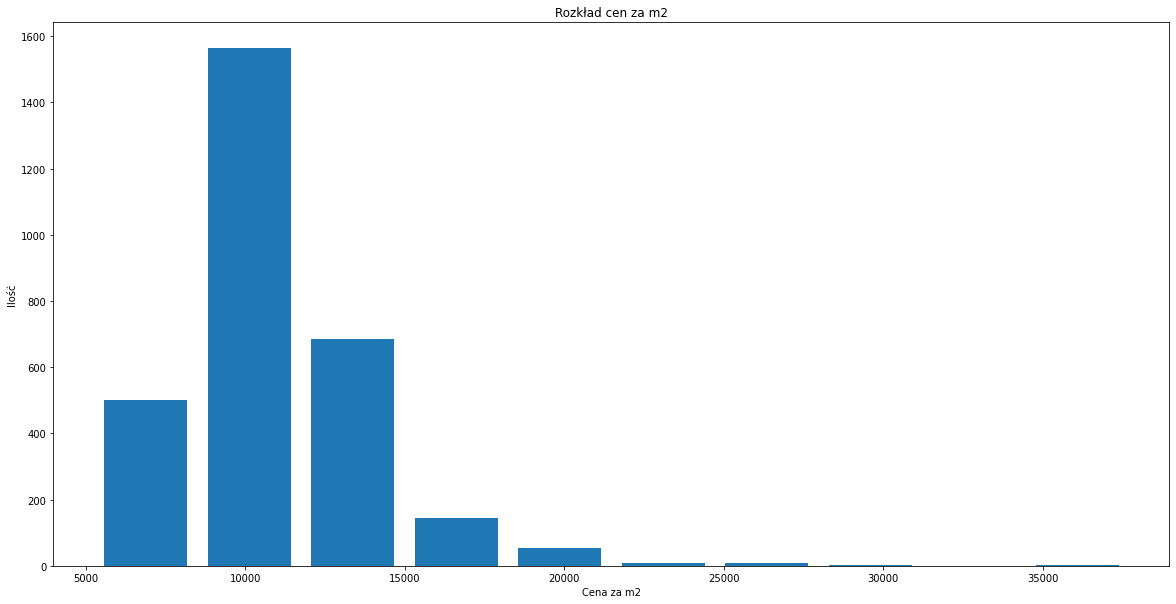

In [ ]:
#Rozkład cen za m2
import matplotlib 
from matplotlib import pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(oferty_2.price_per_m2,rwidth=0.8)
plt.xlabel("Cena za m2")
plt.ylabel("Ilość")
plt.title("Rozkład cen za m2")


In [ ]:
import plotly.express as px
fig = px.bar(oferty_2, x='location', y='price_per_m2', color = 'location')
fig.show()

# #Przygotowanie danych

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



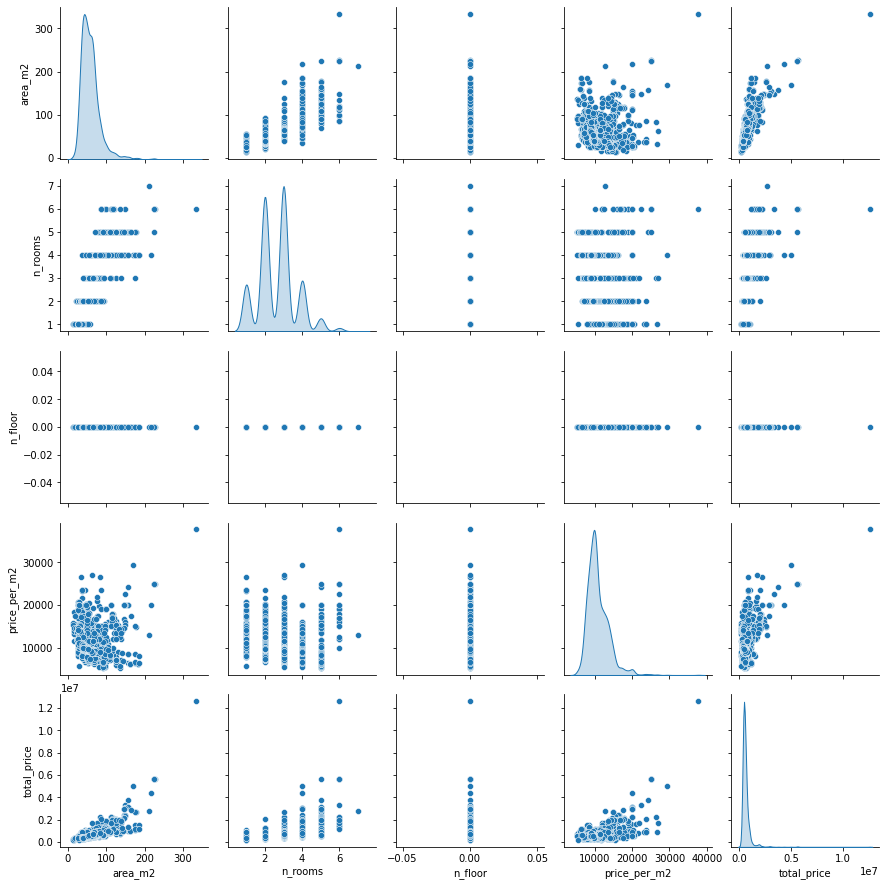

In [ ]:
#Wykres zależności cech
import seaborn as sns
sns.pairplot(oferty_2, diag_kind = "kde");

In [ ]:
# Znajdywanie wartości odstających - CENA

px.box(oferty_2, x= "total_price", title = "Rozrzut ceny", orientation = 'h')

In [ ]:
# Znajdywanie wartości odstających - CENA za m2

px.box(oferty_2, x= "price_per_m2", title = "Rozrzut ceny", orientation = 'h')

In [ ]:
# Znajdywanie wartości odstających - liczba pokoi

px.box(oferty_2, x= "n_rooms", title = "Rozrzut liczby pokoi", orientation = 'h')

In [ ]:
# Znajdywanie wartości odstających - metraż

px.box(oferty_2, x= "area_m2", title = "Rozrzut metrażu", orientation = 'h')

In [ ]:
# usuwanie outliers - total_price
Q3 = np.nanpercentile(oferty_2['total_price'], 75)
Q1 = np.nanpercentile(oferty_2['total_price'], 25)
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(IQR)
gorne_ograniczenie  = Q3 + 4* IQR
dolne_ograniczenie  = Q1 
print("Górne ograniczenie:", gorne_ograniczenie)
print("Dolne ograniczenie:", dolne_ograniczenie)


678994.015
435438.0
243556.015
Górne ograniczenie: 1653218.0750000002
Dolne ograniczenie: 435438.0


In [ ]:
oferty_3 = oferty_2.drop(oferty_2[(oferty_2.total_price < dolne_ograniczenie) | (oferty_2.total_price > gorne_ograniczenie)].index)


In [ ]:
# Znajdywanie wartości odstających - CENA

px.box(oferty_3, x= "total_price", title = "Rozrzut ceny", orientation = 'h')

In [ ]:
px.box(oferty_3, x= "area_m2", title = "Rozrzut metrażu", orientation = 'h')

In [ ]:
# usuwanie outliers - area_m2
Q3 = np.nanpercentile(oferty_3['area_m2'], 75)
Q1 = np.nanpercentile(oferty_3['area_m2'], 25)
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(IQR)
gorne_ograniczenie  = Q3 + 3* IQR
dolne_ograniczenie  = Q1 
print("Górne ograniczenie:", gorne_ograniczenie)
print("Dolne ograniczenie:", dolne_ograniczenie)


70.83
48.455
22.375
Górne ograniczenie: 137.95499999999998
Dolne ograniczenie: 48.455


In [ ]:
oferty_4 = oferty_3.drop(oferty_3[(oferty_3.area_m2 < dolne_ograniczenie) | (oferty_3.area_m2 > gorne_ograniczenie)].index)

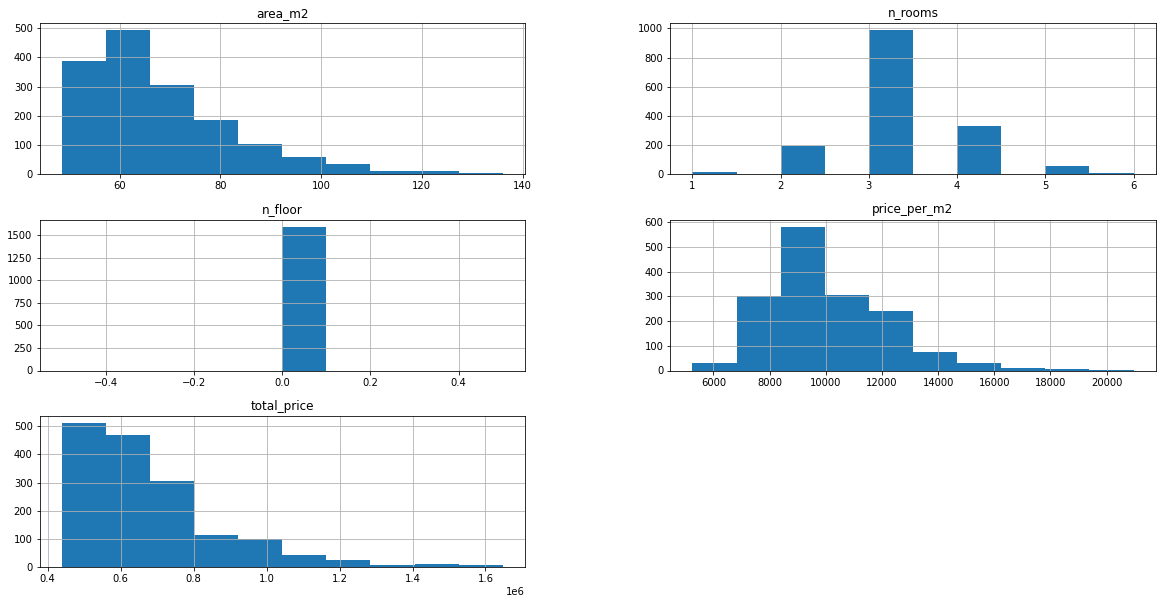

In [ ]:
# rozkład po usunięciu wartości odstających
oferty_4.hist(bins=10);

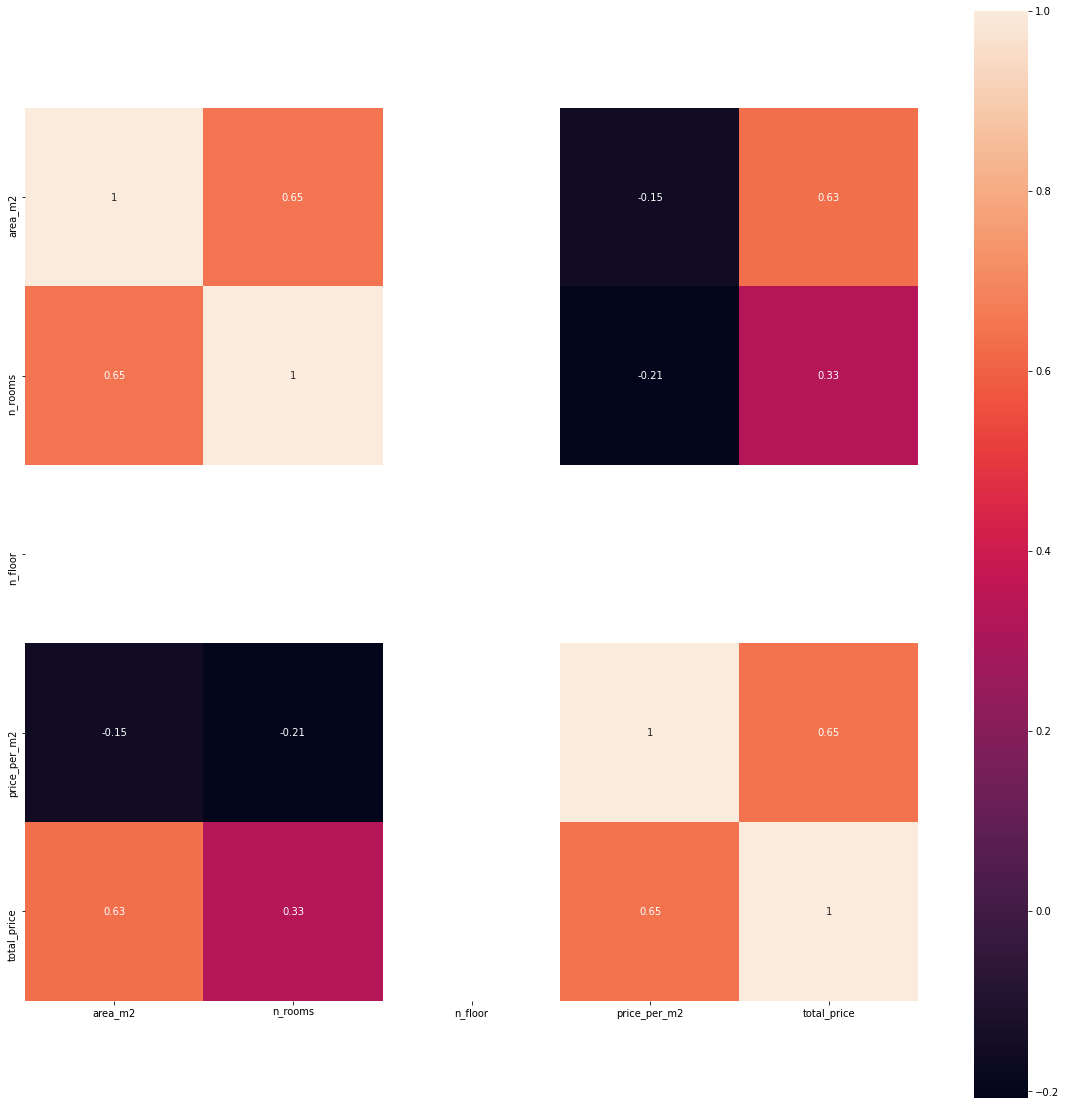

In [ ]:
# sprawdzenie korelacji między zmiennymi
korelacja = oferty_4.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(korelacja, square = True, annot = True);

In [ ]:
# zapisywanie pliku z danymi
oferty_4.to_csv("oferty_4.csv", index=False)

# #One HOT encoding dla lokacji

In [ ]:
dummies = pd.get_dummies(oferty_4.location)
dummies.head(3)

,Bieżanów,Bronowice Małe,Czyżyny,Czyżyny Stare,Dąbie,Dębniki,Grzegórzki,Górka Narodowa,Inna Lokalizacja,Krowodrza,Mistrzejowice,Nowa Huta,Olsza,Os. Prądnik Biały,Podgórze,Prądnik Biały,Prądnik Czerwony,Płaszów,Salwator,Stare Miasto,Wola Duchacka,Wola Justowska,Zabłocie,Zwierzyniec
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
oferty_5 = pd.concat([oferty_4,dummies.drop('Inna Lokalizacja',axis='columns')],axis='columns')
oferty_5.head()

,location,area_m2,n_rooms,n_floor,price_per_m2,total_price,Bieżanów,Bronowice Małe,Czyżyny,Czyżyny Stare,Dąbie,Dębniki,Grzegórzki,Górka Narodowa,Krowodrza,Mistrzejowice,Nowa Huta,Olsza,Os. Prądnik Biały,Podgórze,Prądnik Biały,Prądnik Czerwony,Płaszów,Salwator,Stare Miasto,Wola Duchacka,Wola Justowska,Zabłocie,Zwierzyniec
7,Krowodrza,53.46,2.0,0,9200.0,491832.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Krowodrza,53.29,2.0,0,9900.0,527571.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Krowodrza,76.35,4.0,0,9900.0,755865.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Krowodrza,50.56,2.0,0,10300.0,520768.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,Inna Lokalizacja,73.15,3.0,0,9200.0,672980.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
oferty_6 = oferty_5.drop('location',axis='columns')
oferty_6.head(2)

,area_m2,n_rooms,n_floor,price_per_m2,total_price,Bieżanów,Bronowice Małe,Czyżyny,Czyżyny Stare,Dąbie,Dębniki,Grzegórzki,Górka Narodowa,Krowodrza,Mistrzejowice,Nowa Huta,Olsza,Os. Prądnik Biały,Podgórze,Prądnik Biały,Prądnik Czerwony,Płaszów,Salwator,Stare Miasto,Wola Duchacka,Wola Justowska,Zabłocie,Zwierzyniec
7,53.46,2.0,0,9200.0,491832.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,53.29,2.0,0,9900.0,527571.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


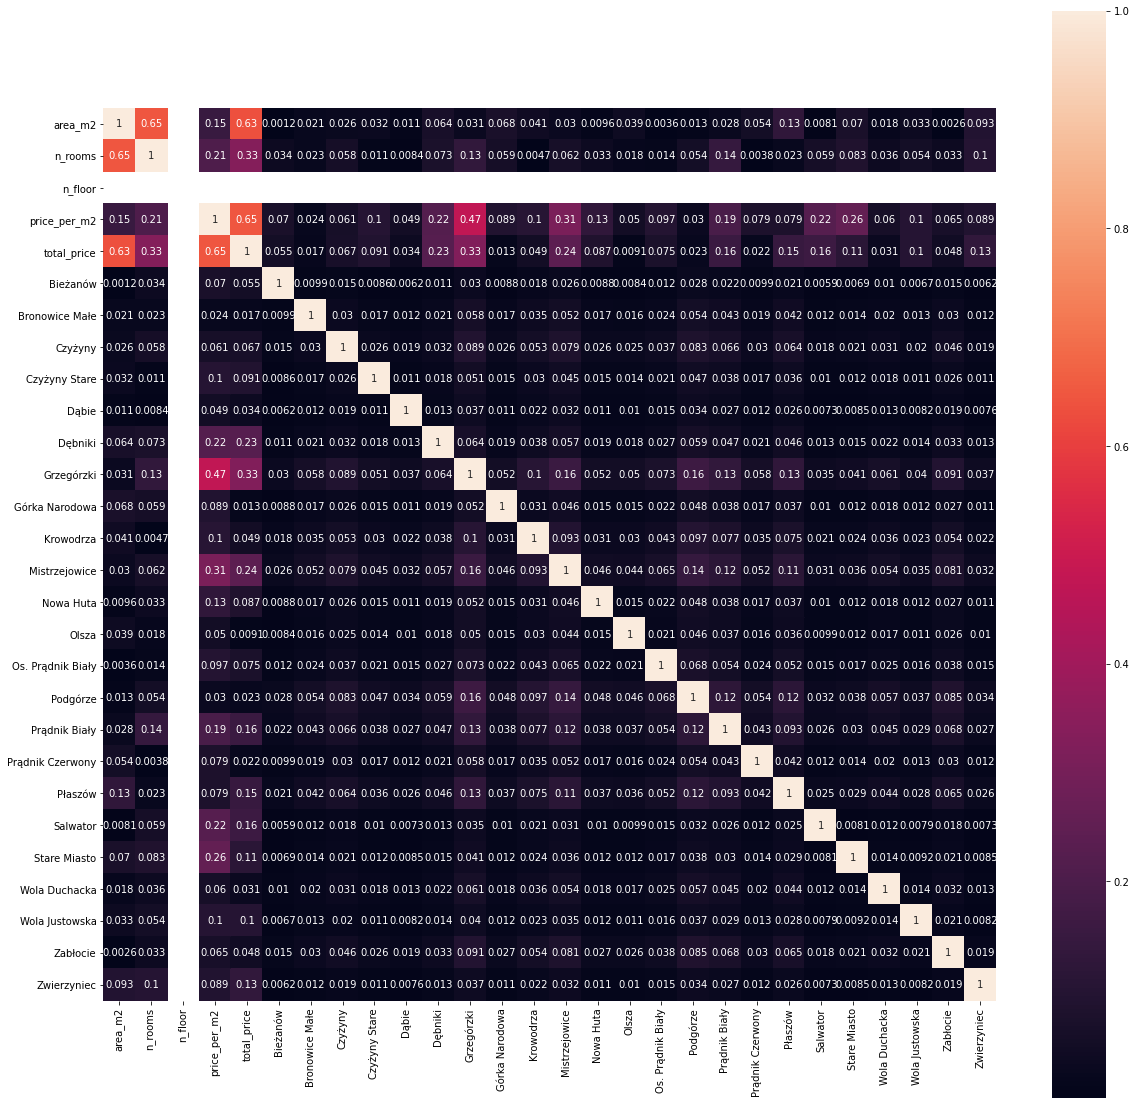

In [ ]:
# sprawdzenie korelacji między zmiennymi - całkowita
korelacja = oferty_6.corr().abs()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(korelacja, square = True, annot = True);

In [ ]:
# zapisywanie pliku z danymi
oferty_6.to_csv("oferty_5.csv", index=False)

# Budowanie modelu

In [ ]:
oferty_2.shape

(2963, 6)

In [ ]:
X = oferty_6.drop(['price_per_m2','total_price'], axis ='columns')

In [ ]:
X.head(3)

,area_m2,n_rooms,n_floor,Bieżanów,Bronowice Małe,Czyżyny,Czyżyny Stare,Dąbie,Dębniki,Grzegórzki,Górka Narodowa,Krowodrza,Mistrzejowice,Nowa Huta,Olsza,Os. Prądnik Biały,Podgórze,Prądnik Biały,Prądnik Czerwony,Płaszów,Salwator,Stare Miasto,Wola Duchacka,Wola Justowska,Zabłocie,Zwierzyniec
7,53.46,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,53.29,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,76.35,4.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = oferty_6.price_per_m2
Y.head(3)

7    9200.0
8    9900.0
9    9900.0
Name: price_per_m2, dtype: float64

#Podział zbiorów na uczący i testowy

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y.values,test_size=0.1,random_state=10)

# *Standaryzacja*

In [ ]:
from sklearn import preprocessing

# standaryzowanie cech objaśniających
standaryzacja = preprocessing.StandardScaler()
fit_stand = standaryzacja.fit(X_train)
X_uczacy_stand = fit_stand.transform(X_train)
X_testowy_stand = fit_stand.transform(X_test)

# Model Regresji Liniowej

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_uczacy_stand,y_train)
lr_clf.score(X_testowy_stand,y_test)

0.6038130352331338

predykcja na 1 obserwacji

In [ ]:
# predykcja na 1 obserwacji używając przygotowany model
print("Predykcja:", lr_clf.predict([X_testowy_stand[7]]))
print("Wartość rzeczywista:", y_test[7])
print("Odchylenie predykcji:", ((lr_clf.predict([X_testowy_stand[7]])-y_test[7])/lr_clf.predict([X_testowy_stand[7]]))*100, "%")

Predykcja: [12782.70490327]
Wartość rzeczywista: 12500.0
Odchylenie predykcji: [2.21162035] %


# obliczenie Mean Squared Error (MSE)

In [ ]:
from sklearn import metrics
predykcja_model_rl = lr_clf.predict(X_testowy_stand)
rl_mse = metrics.mean_squared_error(y_test, predykcja_model_rl)
print("MSE - LinearRegression: ", rl_mse)

MSE - LinearRegression:  2258486.5163902147


# obliczenie odchylenia średniej kwadradowej od wartości rzeczywistej 
# Root Mean Square Error (RMSE) 

In [ ]:
rl_rmse = np.sqrt(rl_mse)
print("RMSE - LinearRegression: ", rl_rmse)

RMSE - LinearRegression:  1502.8261763724422


In [ ]:
# rozrzut ceny w całym zbiorze
Y.describe()
#niedotrenowanie modelu

count     1591.000000
mean     10069.756128
std       2141.610900
min       5250.000000
25%       8600.000000
50%       9700.000000
75%      11402.000000
max      20956.000000
Name: price_per_m2, dtype: float64

K FOLD CROSS VALIDATION - pomiar dokładności modelu LR





In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.65455034, 0.60776249, 0.58238141, 0.72712441, 0.57940357])

# podział na 5 iteracji - score ok. 60 %, prawdopodobnie dobrano zły model

# Szukanie najlepszego modelu używając GRIDSEARCHCV

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
       'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
              'criterion' : ['mse','friedman_mse'],
              
     
            }
        }

        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.605621,{'normalize': False}
1,lasso,0.607538,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.580243,"{'criterion': 'mse', 'splitter': 'random'}"
3,random_forest,0.693272,{'criterion': 'mse'}


#RANDOM FOREST - lepszy model - ok. 70 %

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestRegressor(), {
                      # liczba dzrzew
                      "n_estimators": [20, 50, 100],
                      # minimalna liczba próbek wymagana do podzielenia węzła
                      "min_samples_split": [2, 5, 20, 50],
                      # maksymalna głębokość drzewa
                      "max_depth": [3, 10, None],
                  
                      # metoda doboru próbek do uczenia każdego drzewa
                      "bootstrap": [False, True], #False->cały zestaw danych jest używany do budowania każdego drzewa
                      # liczba dzrzew
                      "n_estimators": [10, 100, 300, 500, 1000],
                      # minimalna liczba próbek wymaganych w każdym węźle liścia
                      "min_samples_leaf": [1, 3, 5],
                      # liczba cech/funkcji, które należy wziąć pod uwagę, szukając najlepszego podziału
                      "max_features": ["auto", "sqrt"] #auto->n_features, sqrt->sqrt(n_features)
                      }, cv=5, return_train_score=False)


clf.fit(X_uczacy_stand,y_train)


AttributeError: ignored

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.01435299, 0.13847909, 0.4059762 , 0.6793777 , 1.35381198,
        0.01436176, 0.13769536, 0.40571465, 0.67798018, 1.35984917,
        0.01437435, 0.13557668, 0.40385847, 0.68082395, 1.34736595,
        0.01392736, 0.13517418, 0.4032187 , 0.67374659, 1.34310331,
        0.01413627, 0.13598809, 0.40652847, 0.67321968, 1.35733218,
        0.01393938, 0.13486056, 0.40821466, 0.67357764, 1.35033908,
        0.01405549, 0.1355844 , 0.40492954, 0.67708859, 1.35042224,
        0.01417465, 0.13448777, 0.45636969, 0.66489401, 1.35141592,
        0.01492329, 0.13564386, 0.40656376, 0.67744317, 1.36031437,
        0.01499748, 0.13624001, 0.40834489, 0.6818337 , 1.35998302,
        0.01400566, 0.13683138, 0.40660701, 0.67080054, 1.35827055,
        0.01409569, 0.13495226, 0.40426145, 0.67363219, 1.33543563,
        0.00922475, 0.08739209, 0.26228871, 0.43796825, 0.88011703,
        0.01018553, 0.0875587 , 0.26496482, 0.43319044, 0.87941046,
        0.00964398, 0.08658338,

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014353,0.000194,0.001437,0.000084,False,3,auto,1,2,10,"{'bootstrap': False, 'max_depth': 3, 'max_feat...",0.331147,0.285060,0.304625,0.293023,0.369757,0.316723,0.030761,658
1,0.138479,0.003403,0.007160,0.001002,False,3,auto,1,2,100,"{'bootstrap': False, 'max_depth': 3, 'max_feat...",0.331147,0.285060,0.304625,0.293023,0.369757,0.316723,0.030761,660
2,0.405976,0.004966,0.019665,0.001145,False,3,auto,1,2,300,"{'bootstrap': False, 'max_depth': 3, 'max_feat...",0.331147,0.285060,0.304625,0.293023,0.369757,0.316723,0.030761,656
3,0.679378,0.004860,0.029292,0.000757,False,3,auto,1,2,500,"{'bootstrap': False, 'max_depth': 3, 'max_feat...",0.331147,0.285060,0.304625,0.293023,0.369757,0.316723,0.030761,654
4,1.353812,0.011896,0.058892,0.003242,False,3,auto,1,2,1000,"{'bootstrap': False, 'max_depth': 3, 'max_feat...",0.331147,0.285060,0.304625,0.293023,0.369757,0.316723,0.030761,652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.015835,0.001971,0.001583,0.000183,True,None,sqrt,5,50,10,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.508158,0.465806,0.453588,0.531494,0.616627,0.515135,0.058032,473
716,0.139041,0.001366,0.007871,0.000094,True,None,sqrt,5,50,100,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.542883,0.555541,0.439797,0.537788,0.636056,0.542413,0.062439,448
717,0.418534,0.006489,0.022605,0.000431,True,None,sqrt,5,50,300,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.537844,0.559762,0.454934,0.535522,0.630647,0.543742,0.056211,442
718,0.699756,0.007727,0.037574,0.000757,True,None,sqrt,5,50,500,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.538646,0.563800,0.455743,0.539489,0.625613,0.544658,0.054569,437


In [ ]:
clf.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [ ]:
clf.best_score_

0.6878806891011694

# Nowy model

In [ ]:
#Nowy model

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500, bootstrap = True, max_depth = None, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 5 )

rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)

cross_val_score(rfr, X, Y, cv=cv)


array([0.70197276, 0.78125421, 0.75078958, 0.75499616, 0.7437209 ])

# Testowanie modelu

In [ ]:

def predict_price(location,area_m2,n_rooms,n_floor):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area_m2
    x[1] = n_rooms
    x[2] = n_floor
    if loc_index >= 0:
        x[loc_index] = 1

    return rfr.predict([x])[0]

In [ ]:
predict_price('Krowodrza', 55, 3, 3)

11070.925361111122

In [ ]:
predict_price('Stare Miasto', 75, 4 ,0)

17674.603315079377

In [ ]:
predict_price('Podgórze', 45,1, 2)

10877.09126666667

In [ ]:
predict_price('Nowa Huta', 65, 2, 0)

7453.090179725823

#Wyeksportowanie modelu

In [ ]:
import pickle
with open('flat_predict','wb') as f:
    pickle.dump(rfr,f)

In [ ]:
# Wykres cena za m2 - lokalizacja
import plotly.express as px

px.box(oferty_5, 
       x = "location", 
       y = "price_per_m2",
       color = "location",
       title = "Cena za m2 z podziałem na lokalizacje")